# *1. Churn Prediction Project*

- Dataset : https://www.kaggle.com/blastchar/telco-customer-churn

# 2. Data Preparation

- Download the data ,read it with pandas
- Look at the data 
- Make Column names and values look uniform 
- check if all the columns read correctly
- check if the churn variable needs any preparation

In [1]:
# import the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("../Data/Telecom Customer Churn/Telco-Customer-Churn.csv") 
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
data.head().T # to check all the columns 

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
data.columns = data.columns.str.lower()

In [5]:
for col in data.columns:
    if data[col].dtype =='object':
        data[col] = data[col].str.lower().str.replace(" ","_")


In [6]:
data.head().T 

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In the above dtypes 
1) we can see seniorcitizen feature is been denoted as int64 maybe because it has values of 0 or 1 instead of YES or NO.

2) totalcharges is been denoted as object which looks like an issue because charges usually are integer dtypes so we will conver that feature to an integer feature .

3) Below when we try to conver totalcharges to integer we get an error because totalcharges has some spaces and since we replaced it with _ we have to remove them and replace it with some values 

In [8]:
# gives the error unable to parse string if not used error='coerce' because _ cannot be converted to int 
tc = pd.to_numeric(data.totalcharges ,errors='coerce')
# error ='coerce' means ignore the values which are not changable to int 
# and conver the ones which are not convertible to be of NAN or Not Null values

In [9]:
data[tc.isnull()][['customerid' ,'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [10]:
data.totalcharges = pd.to_numeric(data.totalcharges ,errors='coerce')

In [11]:
data.totalcharges = data.totalcharges.fillna(0) # Replaced the values with _ to with 0 
# Replacing with 0 is not the best way to deal with the missing values but since we have only few values missing we may considerabs 
# doing this sort of filling up the null values with 0 

In [12]:
data[tc.isnull()][['customerid' ,'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [13]:
data.isnull().sum() 

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
data.churn = data.churn.map({"yes":1 , 'no':0})

# data.churn = (data.churn == 'yes').astype(int)
# data.churn.head() 

# 3. Setting Up Validation Framework  

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train , df_test = train_test_split(data , test_size=0.2 , random_state=1)

In [17]:
# Here df_full_train is only 80% and we take 20% of it to validation so 20/80 is 0.25% and hence test_size = 0.25
df_train , df_val = train_test_split(df_full_train , test_size=0.25 , random_state=1)


In [18]:
len(df_train) ,len(df_val) , len(df_test)

(4225, 1409, 1409)

In [19]:
df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test  = df_test.reset_index(drop= True)

In [20]:
y_train =df_train.churn.values 
y_val = df_val.churn.values 
y_test =df_test.churn.values 

In [21]:
len(y_train) , len(y_val) , len(y_test)

(4225, 1409, 1409)

In [22]:
del df_train['churn']
del df_val['churn']
del df_test['churn'] 

# 4. Exploratory Data Analysis 

In [23]:
# we will use the df_full_train data because it has churn column included in it. 
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [25]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [26]:
df_full_train['churn'].value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [27]:
# we can see the percentage of users also 
df_full_train['churn'].value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [28]:
global_churn_rate = df_full_train['churn'].mean()
round(global_churn_rate , 2)

0.27

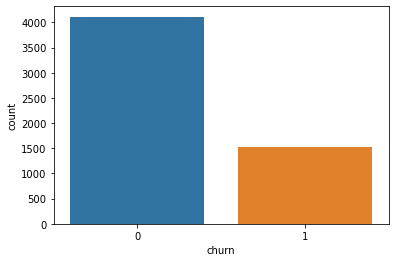

In [29]:
# plotting the churn value counts 
sns.countplot(df_full_train['churn']);

In [30]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [31]:
# selecting the columns with integer based values 
# we are not going to select the feature SeniorCitizen because it a categorical variable but mistakenly 
# made as the int64 column 
numerical = ['tenure' , 'monthlycharges' ,'totalcharges']

In [32]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [33]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents'
               , 'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection', 
               'techsupport','streamingtv', 'streamingmovies', 'contract',
               'paperlessbilling','paymentmethod']

In [34]:
df_full_train[categorical].nunique() # gives the value of total unique values in the column 

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 5. Feature Importance - Churn Rate and Risk Ratio 
- Churn rate 
- Risk Ratio 
- Mutual Information - later

### Churn Rate

In [35]:
churn_female = df_full_train[df_full_train['gender'] =='female'].churn.mean() # This mean calculates the 1's in the churn column because
# it is binary data with 0 and 1 
churn_female 

0.27682403433476394

In [36]:
churn_male = df_full_train[df_full_train['gender'] =='male'].churn.mean()
churn_male 

0.2632135306553911

In [37]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [38]:
global_churn - churn_female

-0.006855983216553063

In [39]:
global_churn - churn_male  # the difference is very minimal here and above so we these gender column does not make much difference in 
# prediction of the churn rate 

0.006754520462819769

In [40]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [41]:
churn_partner = df_full_train[df_full_train.partner =='yes'].churn.mean()
churn_partner

0.20503330866025166

In [42]:
churn_no_partner = df_full_train[df_full_train.partner =='no'].churn.mean()
churn_no_partner

0.3298090040927694

In [43]:
global_churn - churn_partner 

0.06493474245795922

In [44]:
global_churn - churn_no_partner
# The above and this values show us that the partner variable has some impact on the churn variable and this indicates that 
# this variable partner has more importance in prediction than the gender variable 

-0.05984095297455855

Some Findings : 
    

1) Difference  (GLOBAL - GROUP) :


    - if global_churn - group_churn(here churn_partner or churn_no_partner) is >0 then the the group is less likely to churn 
    because the global_churn value is higher
    
    - if global_churn - group_churn(here churn_partner or churn_no_partner) is <0 then the group is more likely to churn 
    because the group_churn value is higher 
    
    
    here we do not care about the sign of the value because for churn_no_partner we got a negative value but with the churn_partner we got the positive value , so we are more interested in larger the difference between the two 

### Risk Ratio 

In [45]:
churn_no_partner/global_churn  # variable without no partner is more likely to churn than the one with partner 
# > 1 more likely to churn  < 1 less likely to churn incase of dividing the churn_group / global_group 

1.2216593879412643

In [46]:
churn_partner/global_churn

0.7594724924338315

###### SELECT 
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff ,
    AVG(churn) /global_churn AS risk 
FROM 
    data 
    
GROUP BY
    gender ; 

In [47]:
from IPython.display import display

In [48]:
# translating above sql query to pandas 
for c in categorical:
    print(c) 
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean']/ global_churn
    print()
    display(df_group)
    print()
    print()

gender



,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen



,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner



,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents



,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice



,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines



,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice



,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity



,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup



,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection



,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport



,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv



,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies



,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract



,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling



,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod



,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Feature Importnace - Mutual Information 

Mutual Information - concept from information theory, it tells us how much we can learn about one varibale if we know the 
value of the another 

- https://en.wikipedia.org/wiki/Mutual_information

In [49]:
from sklearn.metrics import mutual_info_score

In [50]:
# the higher the value from this code the more important the independent variable here = df_full_train.contract is 
# to the churn prediction 
mutual_info_score(df_full_train.churn , df_full_train.contract)

0.0983203874041556

The mutual_info_Score suggests that for example if somebody says the person is a female then we learn nothing about whether
they are going to churn or not 

But at the same time if somebody says the person of some contract type then we sure say they might churn to a certain
level of confidence 

In [51]:
# It looks like gender is very very not super important in for the churn prediction 
mutual_info_score(df_full_train.churn , df_full_train.gender)

0.0001174846211139946

In [52]:
# This is less that important than the contract but much important than the gender variable or feature 
mutual_info_score(df_full_train.partner , df_full_train.churn)

0.009967689095399745

In [53]:
def mutual_info_churn_scores(series):
    return mutual_info_score(series , df_full_train.churn)


In [54]:
df_full_train[categorical].apply(mutual_info_churn_scores).sort_values(ascending=False) 
#the function passed in apply takes only one variable so we create one

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature Importance - Correlation

How about numerical columns?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [55]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

1) As the Tenure increares(the longer he stays with the company) it is more likely that the person is not going to churn

2) As the montly charges increares the person is more likely to leave the company

3) As the total charges increases the person is more likely not going to churn 

In [56]:
df_full_train[df_full_train.tenure <=2].churn.mean() 
# The less time the person stays the more likely he leaves the company

0.5953420669577875

In [57]:
df_full_train[(df_full_train.tenure >2) &(df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [58]:
# People who stays longer than 1 year are more likley to not leave the company 
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

- The person staying for a tenure(period of time) of less than 2 months is likely to leave the company by 60%
- The person staying for a tenure(period of time) of greater than 2 months and less than 12 months is likely to leave the company by 40%
- The person staying for a tenure(period of time) of greater than 12 months is likely to leave the company by only 17%

In [59]:
# For monthly charges as the monthly charges increases the churn rate increases 
df_full_train[df_full_train.monthlycharges <=20].churn.mean() 

0.08795411089866156

In [60]:
df_full_train[(df_full_train.monthlycharges >20) &(df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [61]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

As seen above in the correlation plot we know as the montly charges increases the more likely he leaves the company 

- The person paying monthly charges  less than 20 dollars leaves company by 0.8%
- The person paying monthly charges  greater than 20 dollars and less than 50 dollars leaves the company with probability of 18%
- The person paying monthly charges greater than 50 dollars leaves more likely with 32%

# One-Hot Encoding

In [62]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder 
from sklearn.feature_extraction import DictVectorizer

In [63]:
df_full_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,male,two_year
1,female,one_year
2,male,two_year
3,male,one_year
4,male,one_year
...,...,...
95,male,two_year
96,male,two_year
97,male,month-to-month
98,male,month-to-month


In [64]:
dicts = df_full_train[['gender', 'contract']].iloc[:100].to_dict(orient = 'records')
dicts[:20] 

[{'gender': 'male', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [65]:
dv = DictVectorizer(sparse=False)

In [66]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [67]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [68]:
dv.transform(dicts)[:20]
# the 1st column is month-to-month , 2nd is one_year , 3rd is two_year 
# the 4th column is female and 5th column is male  

array([[0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [69]:
# even if we pass the numerical column to the DictVectorizer function it does not do anything to that column and shows it 
# exactly like that in the matrix

train_dicts = df_train[numerical+categorical].to_dict(orient='records')

In [70]:
dv = DictVectorizer(sparse= False)

In [71]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [72]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [73]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [74]:
X_train = dv.transform(train_dicts)

In [75]:
val_dicts = df_val[numerical +categorical].to_dict(orient ='records')

In [76]:
X_val = dv.transform(val_dicts)

In [77]:
dv = DictVectorizer(sparse= False)
train_dict = df_train[numerical+categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[numerical +categorical].to_dict(orient ='records')
X_val = dv.transform(val_dict)

# Logistic Regression

- Binary Classification

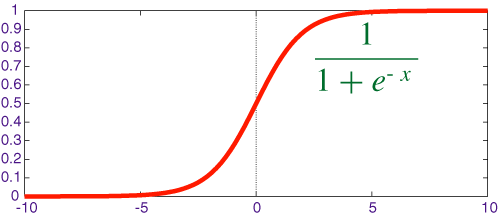

In [78]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [79]:
z = np.linspace(-5,5,51)

In [80]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

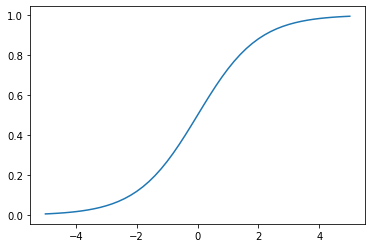

In [81]:
plt.plot(z,sigmoid(z));

In [82]:
def linear_regression(xi):
    result = w0 
    
    for j in range(len(w)):
        result += xi[j]*w[j]
        
    return result

In [83]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score += xi[j]*w[j]
        
    return sigmoid(score)

# Training Logistic Regression with scikit-learn

- Train a model with scikit-learn
- Apply it to validation dataset
- Calculate the accuracy

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [86]:
model.intercept_

array([-0.10903682])

In [88]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [90]:
model.predict_proba(X_train)

array([[0.90452073, 0.09547927],
       [0.32067002, 0.67932998],
       [0.36631917, 0.63368083],
       ...,
       [0.46838966, 0.53161034],
       [0.95745828, 0.04254172],
       [0.30127083, 0.69872917]])

In [92]:
# selecting only the second column which is probability of predictions for 1 which is churn
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899671, 0.20451144, 0.21221197, ..., 0.13638829, 0.79976909,
       0.83740605])

In [97]:
churn_predictions = (y_pred>=0.5)
churn_predictions

array([False, False, False, ..., False,  True,  True])

In [94]:
y_pred[y_pred >=0.5].mean()

0.6493404389809817

In [99]:
# People who we found in validation dataset that will leave the company or churn 
df_val[churn_predictions][:5]
# we can filter the dataset with 
# df_val[churn_predictions].customerid to get the id where we have to send the promotinal emails to make them stay

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15


In [100]:
df_val[churn_predictions].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [101]:
y_val 

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [104]:
churn_predictions.astype(int) 

array([0, 0, 0, ..., 0, 1, 1])

In [111]:
df_pred = pd.DataFrame()
df_pred['probability'] = model.predict_proba(X_val)[:,1]
df_pred['prediction'] = churn_predictions.astype(int) #converting to astype int becasue it converts True False to 1,0
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual 

In [112]:
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204511,0,0,True
2,0.212212,0,0,True
3,0.543050,1,1,True
4,0.213776,0,0,True
...,...,...,...,...
1404,0.313665,0,0,True
1405,0.039358,0,1,False
1406,0.136388,0,0,True
1407,0.799769,1,1,True


In [106]:
# calculating accuracy 
(y_val == churn_predictions).mean()

0.8034066713981547

In [107]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val , churn_predictions)

0.8034066713981547

# Model Interpretation 

- look at the co-efficients
- Train a smaller model with fewer features

In [113]:
a = [1,2,3,4]
b = 'abcd'

In [114]:
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [115]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [116]:
# the weights the model calculated for each of the features 
dict(zip(dv.get_feature_names() , model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [117]:
small = ['contract', 'tenure','monthlycharges']

In [118]:
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [119]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [122]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [124]:
dv_small =DictVectorizer(sparse = False)

In [125]:
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [126]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [128]:
X_train_small = dv_small.transform(dicts_train_small)

In [130]:
X_train_small

array([[  0.  ,   0.  ,   1.  , 115.5 ,  72.  ],
       [  1.  ,   0.  ,   0.  ,  95.25,  10.  ],
       [  1.  ,   0.  ,   0.  ,  75.55,   5.  ],
       ...,
       [  1.  ,   0.  ,   0.  ,  90.  ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  24.5 ,  27.  ],
       [  1.  ,   0.  ,   0.  ,  80.85,   9.  ]])

In [131]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [132]:
w0 = model_small.intercept_[0]
w0

-2.4767756632262654

In [133]:
w = model_small.coef_[0]
w 

array([ 0.97004492, -0.0251365 , -0.94872201,  0.02748236, -0.03618424])

In [134]:
dict(zip(dv_small.get_feature_names() , w.round(3))) 

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

This above values show us that 
- if a person is on month-month-contract he is more likley to churn
- if a person is on 1-year or 2-year contract he is not likley to churn (the correlation is negative)

In [135]:
# for a person with 50 dollar monthly charges 
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [136]:
sigmoid(-0.3300000000000001)

0.41824062315816374

In [138]:
# for a person with 60 dollar monthly charges he is more likely to leave than the one with 50 dollar charge 
# Person with montly contract + paying 60 dollars + with company for 1 month then he is more to leave  
-2.47 + 0.97 + 60*0.027 + 1*(-0.036)

0.08399999999999966

In [139]:
sigmoid(0.08399999999999966) # he is more likely to leave 

0.5209876607065322

# Using the model

In [140]:
dicts_full_train = df_full_train[numerical+categorical].to_dict(orient='records')

In [141]:
dv_full = DictVectorizer(sparse = False)

In [143]:
X_full_train  = dv_full.fit_transform(dicts_full_train)

In [144]:
y_full_train = df_full_train.churn.values 

In [145]:
model = LogisticRegression()
model.fit(X_full_train , y_full_train)

LogisticRegression()

In [146]:
dicts_test = df_test[numerical+categorical].to_dict(orient='records')

In [148]:
X_test = dv_full.transform(dicts_test)

In [152]:
y_pred = model.predict_proba(X_test)[:,1] 

In [153]:
churn_decision = (y_pred >=0.5)

In [154]:
(churn_decision ==y_test).mean()

0.815471965933286

In [155]:
# for example let's take 1 customer from test datset to see how the model works 

customer = dicts_test[10]
customer

{'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45,
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check'}

In [156]:
customer =dv_full.transform([customer])

In [157]:
customer.shape # 1 because only 1 customer with 45 features 

(1, 45)

In [158]:
model.predict_proba(customer)

array([[0.5943189, 0.4056811]])

In [160]:
model.predict_proba(customer)[0,1] # only 40% chance of churing for this customer
# we used [0,1] instead of [1] because the output for predict_proba is a two dimensional matrix 

0.4056810977967386

In [161]:
y_test[10] # so the model correctly predicted that the customer is not going to churn 

0

In [162]:
customer = dicts_test[-1] 
customer

{'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5,
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check'}

In [163]:
customer =dv_full.transform([customer])

In [164]:
model.predict_proba(customer) # the model predicts she is going to churn 

array([[0.40311479, 0.59688521]])

In [166]:
y_test[-1] # the actual value is also shows that she is going to churn 

1